# Рассчитываем оптимальную цену на товар для максимизации прибыли исходя из эластичности спроса
подготовил: [Вова Сизов](mailto:vladimirsizov@yandex.ru)
<hr>

Рассмотрим пример рассчета получения максимального размера выручки исходя из эластичности спроса на товар.

Будем использовать сгенерированные данные на гипотетический товар.

In [1]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', rc={'figure.figsize': (12,6.75)})

Для начала сгенерируем данные кривой спроса которые будут показывать зависимость изменения продаж от размера скидки.  
В качестве начальных данных: 
- нормальный размер продаж (100%) берём значение 1 (колонка sales)
- нормальный размер цены (100%) берём значение 1 (колонка discount)

In [2]:
x_, y_ = 0.8, 8
x, y = [], []

for i in range(100):
    x_ += 0.005
    y_ *= 0.95
    x.append(x_)
    y.append(y_)

elast = pd.DataFrame({'discount': x, 'sales': y})
elast.head()

,discount,sales
0,0.805,7.600000
1,0.810,7.220000
2,0.815,6.859000
3,0.820,6.516050
4,0.825,6.190247


Также нам известно что себестоимость составляет 85% от нормальной цены товара, определим её в переменной cost_price

In [3]:
cost_price = 0.85

Нарисуем полученные данные на графике:

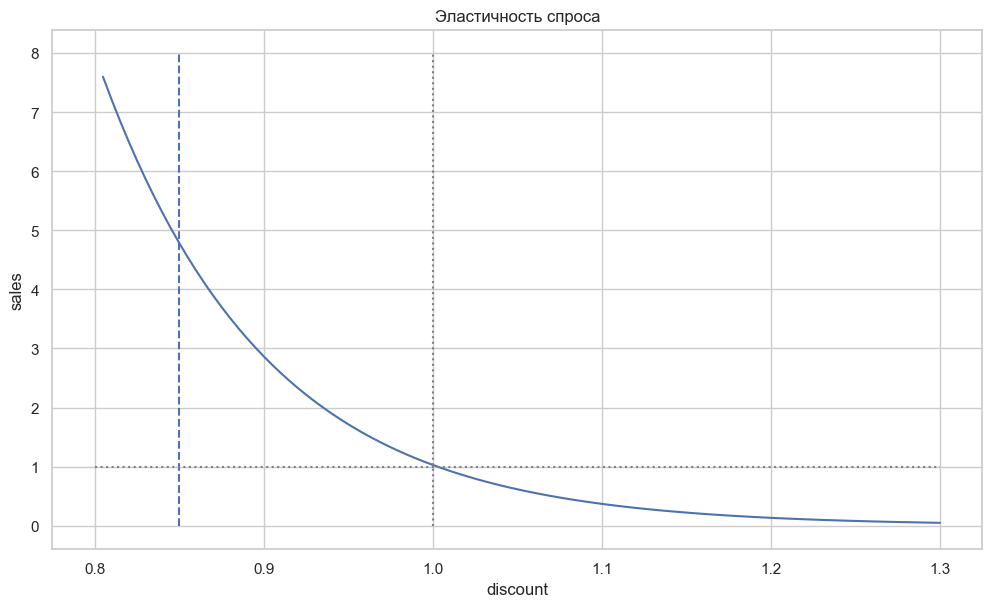

In [4]:
sns.lineplot(elast, x='discount', y='sales');
plt.vlines(x=cost_price, ymin=0, ymax=8, linestyle='--');
plt.hlines(y=1, xmin=0.8, xmax=1.3, linestyle='dotted', color='gray');
plt.vlines(x=1, ymin=0, ymax=8, linestyle='dotted', color='gray');
plt.title('Эластичность спроса');

Посчитаем размер маржинальности товара в зависимости от эластичности спроса, добавим данные в таблицу колонкой margin
Затем посчитаем размер выручки исходя из эластичности спроса в колонку revenue

In [5]:
elast['margin'] = elast.discount - cost_price
elast['revenue'] = elast.margin * elast.sales

Найдём в данных оптимальный коэффециент размера скидки для получения максимального размера выручки - это число доля от нормальной цены товара которой мы определили сначала, при котором мы получим максимальный размер прибыли.  
На графике кривой прибыли обозначено красной точкой.

In [6]:
max_revenue = elast[elast.revenue == elast.revenue.max()]
x_max = max_revenue.discount.values[0]
y_max = max_revenue.revenue.values[0]

display(max_revenue)
round(x_max, 3)

,discount,sales,margin,revenue
28,0.945,1.807484,0.095,0.171711


0.945

Теперь посмотрим на данные:

,discount,sales,margin,revenue
0,0.805,7.600000,-0.045,-0.342000
1,0.810,7.220000,-0.040,-0.288800
2,0.815,6.859000,-0.035,-0.240065
3,0.820,6.516050,-0.030,-0.195481
4,0.825,6.190247,-0.025,-0.154756


Оказалось что выгоднее всего продавать данный товар со скидкой 5.5 % от изначальной цены, это даст максимальный прирост прибыли от продаж.


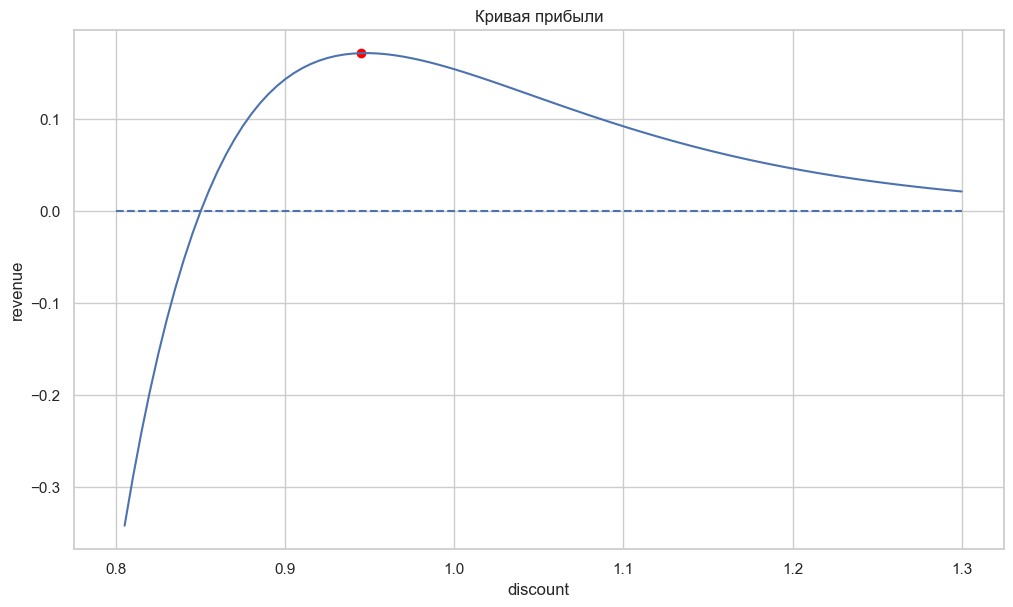

In [12]:
display(elast.head(5))

print('Оказалось что выгоднее всего продавать данный товар со скидкой', round((1 - x_max)*100, 2), 
      '% от изначальной цены, это даст максимальный прирост прибыли от продаж.')

sns.lineplot(elast, x='discount', y='revenue');
plt.hlines(y=0, xmin=0.8, xmax=1.3, linestyle='--');
plt.scatter(x_max, y_max, color='red');
plt.title('Кривая прибыли');